# (Simulation) Earthquake
> Example 1

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [논문연구]

#### 5.1.1 SPECTRAL NETWORK

Bruna 가 the spectral network를 제안했는데, 이 convolution operation 는 그래프 라플라시안의 eigendecomposition 을 계산해 푸리에 도메인에서 정의된다. 이 operation은 $\theta \in \mathbb{R}^N$에 의해 파라메터화된 필터 $g_{\theta} = diag(\theta) $를 거쳐 $x \in \mathbb{R}^N$ 의 multiplication으로 정의된다.

$$g_{\theta} \star x = U g_{\theta}(\Lambda) U^{\top}x$$

$U$가 정규화된 그래프 라플라시안의 고유벡터 행렬일떄($L = I_N - D^{-\frac{1}{2}}AD^{-\frac{1}{2}} = U\Lambda U^{\top}$), 고유값 $\Lambda$의 대각행렬을 가진다.

이 operation 는 잠재적으로 강한 computations 과 비차원적 로컬화된 필터이다. Henaff 는 smooth coefficiaent를 가진 파라미터를 소개함으로써 차원적으로 로컬화된 spectral filters 를 만드는 것을 시도한다.

#### 5.1.2 CHEBNET

$$g_{\theta} \star x \approx  \sum^{K}_{k=0}\theta_k T_k (\tilde{L})x$$

 The Chebyshev polynomials..

$\tilde{L} = \cfrac{2}{\lambda_{max}} L - I_N$

$T_k (x) = 2xT_{k-1}(x) - T_{k-2} (x)$

$T_0 (x) = 1$, $T_1(x) = x$

라플라시안에서 k번째 다항식 = k번째 로컬화된?!

## imports

In [8]:
import rpy2
import matplotlib.pyplot as plt
import numpy as np

In [9]:
%load_ext rpy2.ipython

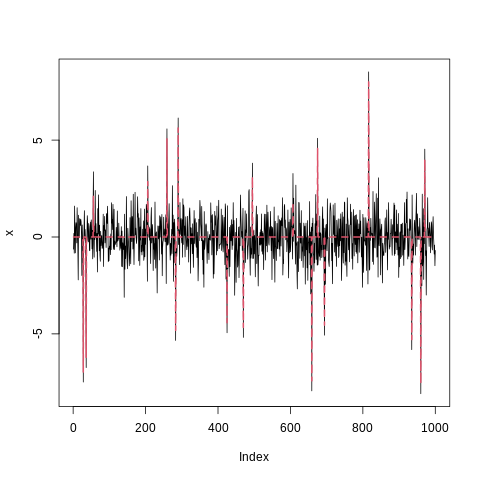

In [10]:
%%R
library(EbayesThresh)
set.seed(1)
x <- rnorm(1000) + sample(c( runif(25,-7,7), rep(0,975)))
plot(x,type='l')
mu <- EbayesThresh::ebayesthresh(x)
lines(mu,col=2,lty=2,lwd=2)

## R + python

`-` R환경에 있던 x를 가지고 오기

In [11]:
%R -o x 

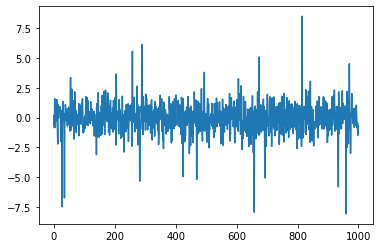

In [12]:
plt.plot(x)

`-` R환경에 있는 ebayesthresh 함수를 가지고 오기

In [13]:
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr

In [14]:
ebayesthresh = importr('EbayesThresh').ebayesthresh

In [15]:
xhat = np.array(ebayesthresh(FloatVector(x)))

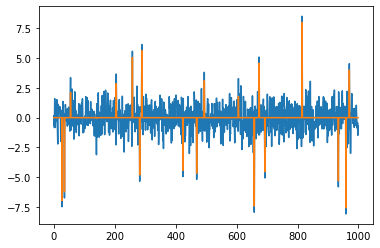

In [16]:
plt.plot(x)
plt.plot(xhat)

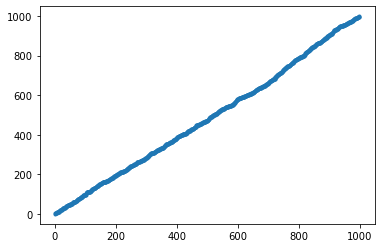

In [50]:
plt.plot(sorted(1000 * np.random.rand(len(x)) + x),'.')

In [19]:
import pandas as pd

In [20]:
_simul = pd.DataFrame(_x,_y).reset_index().rename(columns={'index':'x',0:'y'}).reset_index()
_simul

,index,x,y
0,0,23.381269,4.801545
1,1,12.774136,2.518099
2,2,13.934598,2.954045
3,3,23.177405,4.316425
4,4,14.800859,2.894270
...,...,...,...
995,995,24.199400,4.902539
996,996,22.604027,4.696940
997,997,3.343142,0.752486
998,998,15.564974,3.409545


In [21]:
_matrix = np.zeros((len(_simul),len(_simul)))

In [22]:
_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
def weigh_simul(i,j):
    if abs(i-j) == 1 : return 1
    else: return 0

In [24]:
_matrix2 = _matrix +  [[weigh_simul(i,j) for i in range(len(_simul))] for j in range(len(_simul))]